<a href="https://colab.research.google.com/github/jainkhere/neuro/blob/main/_Experiments/11-30/Experiments_image_processing_fly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
!pip install mahotas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 23.4 MB/s 


In [ ]:
import mahotas as mh

In [ ]:
a= mh.imread("/content/image.png")

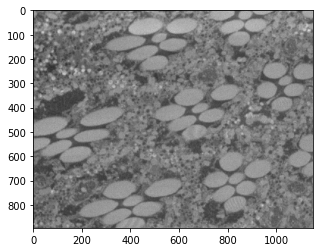

In [ ]:
imshow(a)

In [ ]:
### try 1 with downsampling (was ok but without was better)

In [ ]:
b = a.copy()[:,:,0]

In [ ]:
b.shape

(894, 1149)

In [ ]:
b = a.copy()[:,:,0]
for i in range(3):
  b = mh.gaussian_filter(b, sigma=1)
  b =  b[::2,::2]

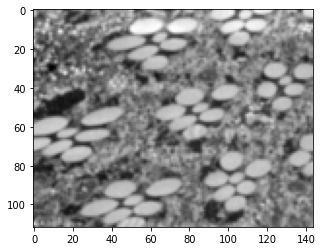

In [ ]:
imshow(b, cmap='gray')

In [ ]:
### here we did the stuff below again WITHOUT downsampling and gave reasonably results

In [ ]:
c = b.copy()
c[c<130] = 0 

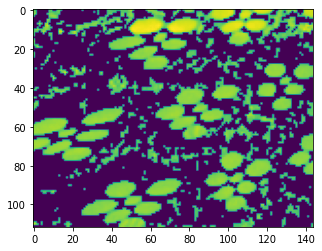

In [ ]:
imshow(c)

In [ ]:
b = a.copy()[:,:,0]

In [ ]:
b.max()

255

In [ ]:
c = b.copy()
c[c<140] = 0 

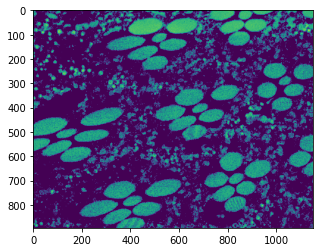

In [ ]:
imshow(c)

In [ ]:
labeled, number  = mh.label(c)


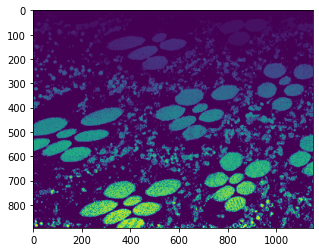

In [ ]:
imshow(labeled)

In [ ]:
sizes = mh.labeled.labeled_size(labeled)


In [ ]:
too_small = np.where(sizes < 1000)

In [ ]:
labeled_only_big = mh.labeled.remove_regions(labeled, too_small)


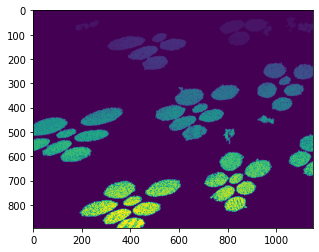

In [ ]:
imshow(labeled_only_big)

In [ ]:
binary_mask = labeled_only_big.copy()
binary_mask[binary_mask > 0] = 1

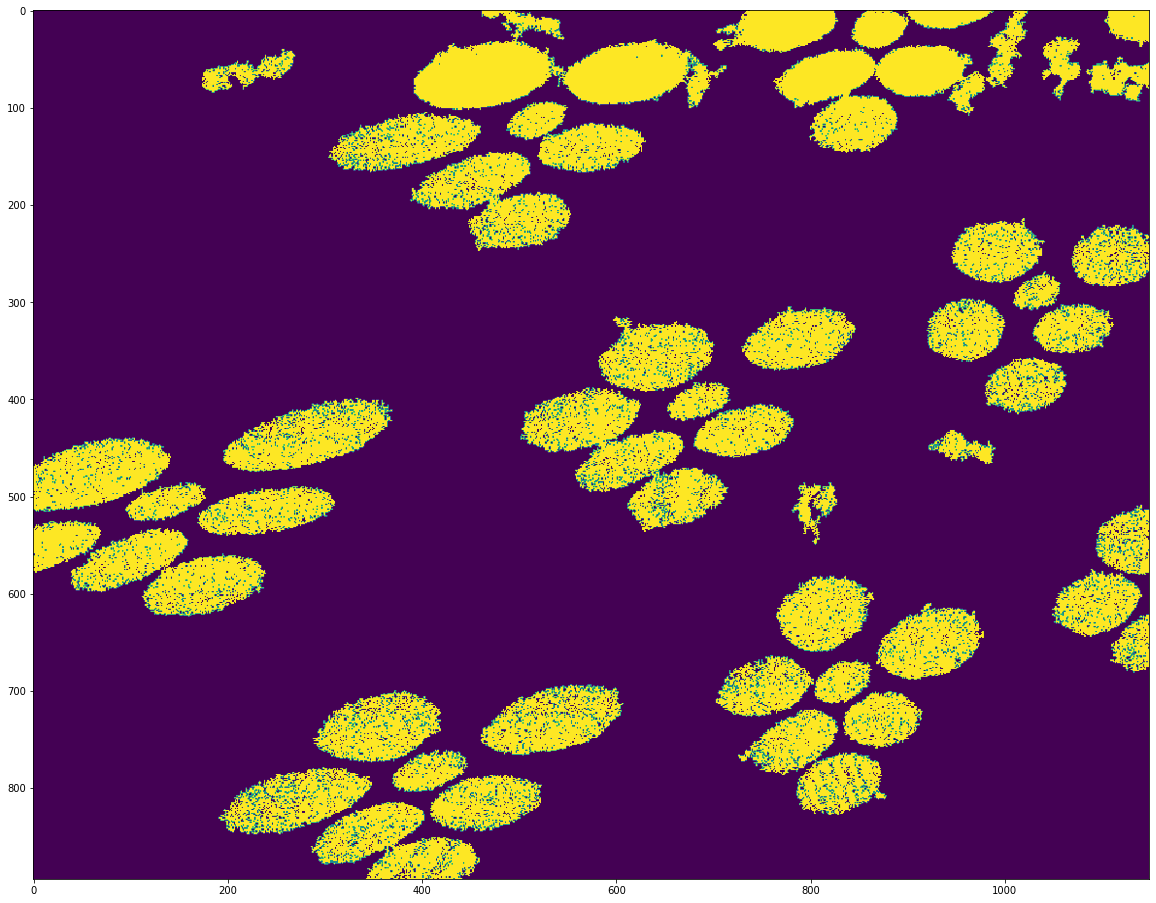

In [ ]:
plt.figure(figsize=(20,20))
imshow(binary_mask)

In [ ]:
binary_mask_closed = mh.morph.close(binary_mask)

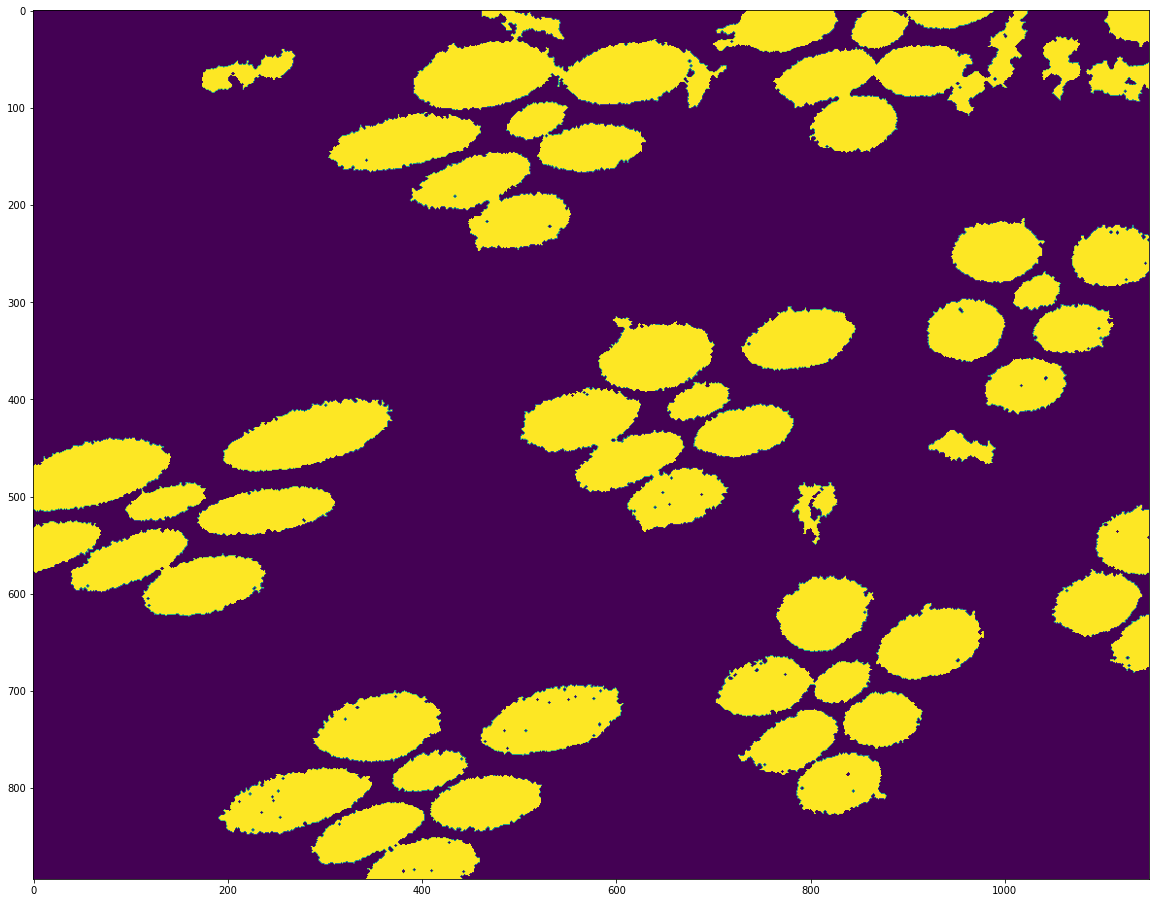

In [ ]:
plt.figure(figsize=(20,20))
imshow(binary_mask_closed)

In [ ]:
binary_mask_closed_filtered = mh.gaussian_filter(binary_mask_closed, sigma=3)

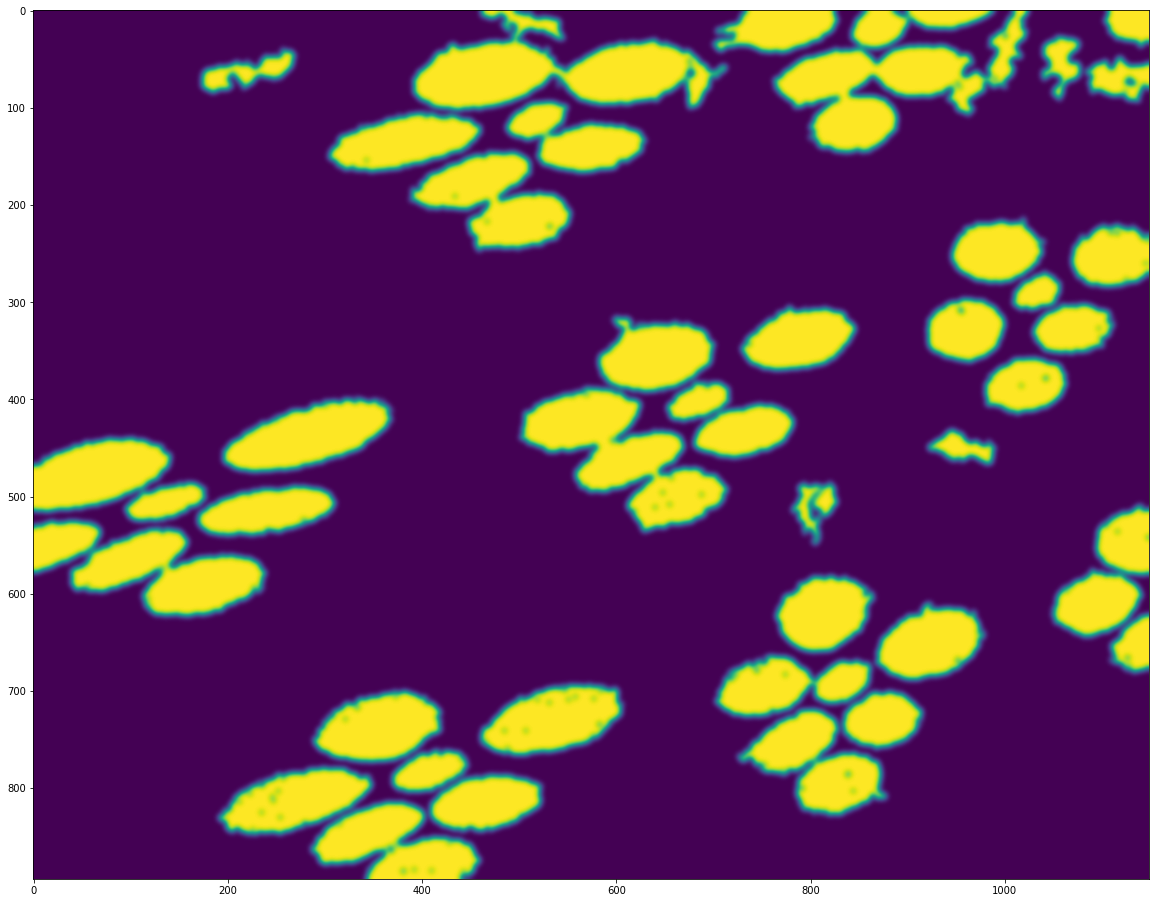

In [ ]:
plt.figure(figsize=(20,20))
imshow(binary_mask_closed_filtered)

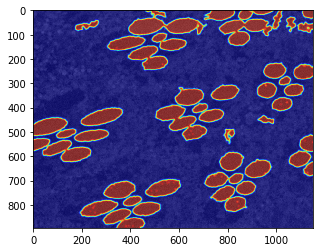

In [ ]:
plt.figure()
plt.imshow(a, 'gray', interpolation='none')
plt.imshow(binary_mask_closed_filtered, 'jet', interpolation='none', alpha=0.7)
plt.show()

In [ ]:
### some more experiments

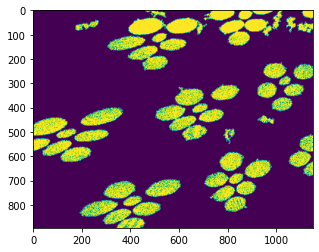

In [ ]:
imshow(binary_mask)

In [ ]:
binary_mask_open = binary_mask.copy()

In [ ]:
binary_mask_open = mh.morph.close_holes(binary_mask_open)

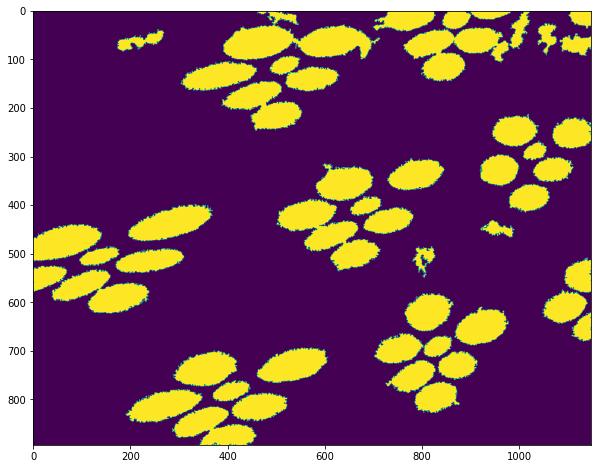

In [ ]:
plt.figure(figsize=(10,10))
imshow(binary_mask_open)

In [ ]:
for i in range(5):
  binary_mask_open = mh.morph.erode(binary_mask_open)

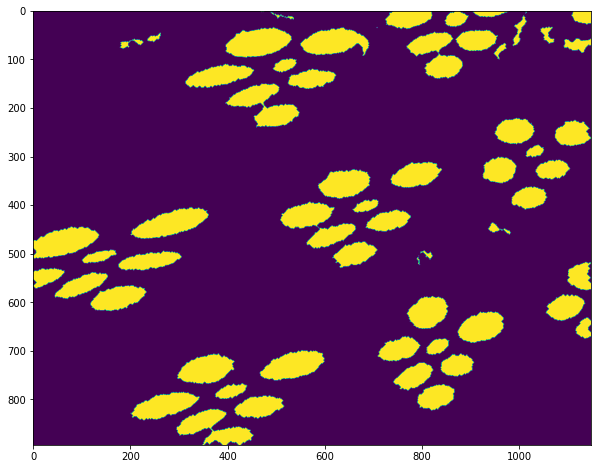

In [ ]:
plt.figure(figsize=(10,10))
imshow(binary_mask_open)

In [ ]:
for i in range(5):
  binary_mask_open = mh.morph.dilate(binary_mask_open)

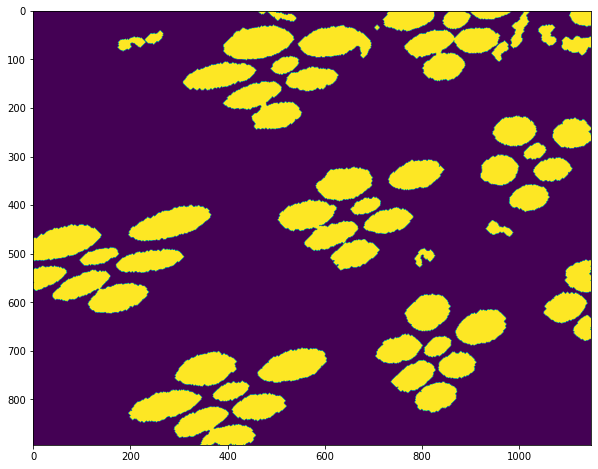

In [ ]:
plt.figure(figsize=(10,10))
imshow(binary_mask_open)

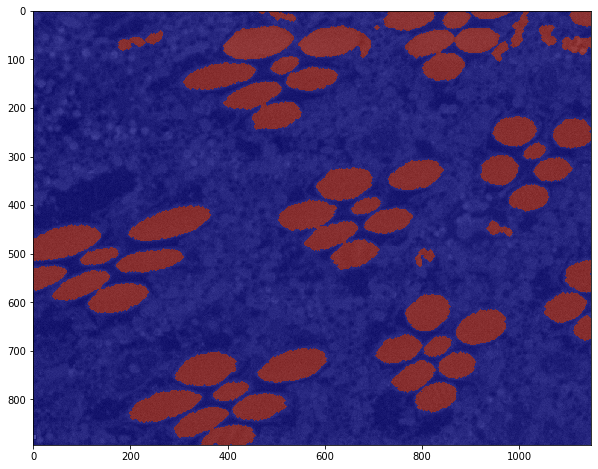

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(a, 'gray', interpolation='none')
plt.imshow(binary_mask_open, 'jet', interpolation='none', alpha=0.7)
plt.show()